## For Regular

In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
file_path = "./data.xlsx"
data = pd.read_excel(file_path, header=2, parse_dates=[0])
data.iloc[:, 1:] = data.iloc[:, 1:].replace({',': ''}, regex=True).astype(float)
result_df = pd.DataFrame()


result_df[data.columns[1]] = data.iloc[:, 1]
result_df[data.columns[2]] = data.iloc[:, 2] - data.iloc[:, 3]

for i in range(4, 55, 3):
    result_df[data.columns[i]] = data.iloc[:, i]
    result_df[data.columns[i+1]] = data.iloc[:, i+1] - data.iloc[:, i+2]
result_df = result_df.reindex(index=result_df.index[::-1])
result_df.reset_index(drop=True, inplace=True)
print(result_df)

     상용총근로시간 (시간)  상용임금총액 (원)  상용총근로시간 (시간).1  상용임금총액 (원).1  상용총근로시간 (시간).2  \
0           184.7   2337843.0           189.1     2802775.0           194.8   
1           157.9   2321172.0           162.6     2723904.0           166.4   
2           191.3   2358601.0           199.6     2790852.0           200.8   
3           187.9   2349945.0           195.8     2786651.0           198.0   
4           179.7   2361842.0           190.8     2787620.0           191.1   
..            ...         ...             ...           ...             ...   
143         173.8   3745866.0           186.0     4375481.0           182.2   
144         160.5   3687578.0           166.7     4330445.0           168.4   
145         160.0   3588166.0           172.1     4211389.0           168.6   
146         173.9   3642157.0           186.5     4263231.0           183.7   
147         161.9   3616477.0           173.9     4251560.0           171.6   

     상용임금총액 (원).2  상용총근로시간 (시간).3  상용임금총액 (원).3  상용

In [4]:
date = data.iloc[:,0]
date = date.reindex(index=date.index[::-1])
date.reset_index(drop=True, inplace=True)
divided_df = pd.DataFrame()
for i in range(1, len(result_df.columns), 2):
    col_name = f"{result_df.columns[i]}/{result_df.columns[i-1]}"
    divided_df[col_name] = result_df[result_df.columns[i]] / result_df[result_df.columns[i-1]]
divided_df.iloc[:, 0:] = divided_df.iloc[:, 0:].round(0)
print(divided_df)

     상용임금총액 (원)/상용총근로시간 (시간)  상용임금총액 (원).1/상용총근로시간 (시간).1  \
0                    12658.0                      14822.0   
1                    14700.0                      16752.0   
2                    12329.0                      13982.0   
3                    12506.0                      14232.0   
4                    13143.0                      14610.0   
..                       ...                          ...   
143                  21553.0                      23524.0   
144                  22976.0                      25977.0   
145                  22426.0                      24471.0   
146                  20944.0                      22859.0   
147                  22338.0                      24448.0   

     상용임금총액 (원).2/상용총근로시간 (시간).2  상용임금총액 (원).3/상용총근로시간 (시간).3  \
0                        12275.0                      23038.0   
1                        14183.0                      26305.0   
2                        12217.0                      23233.0   
3      

C:\Users\KYM\AppData\Local\Temp\ipykernel_17760\4056041409.py:23: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\Users\KYM\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


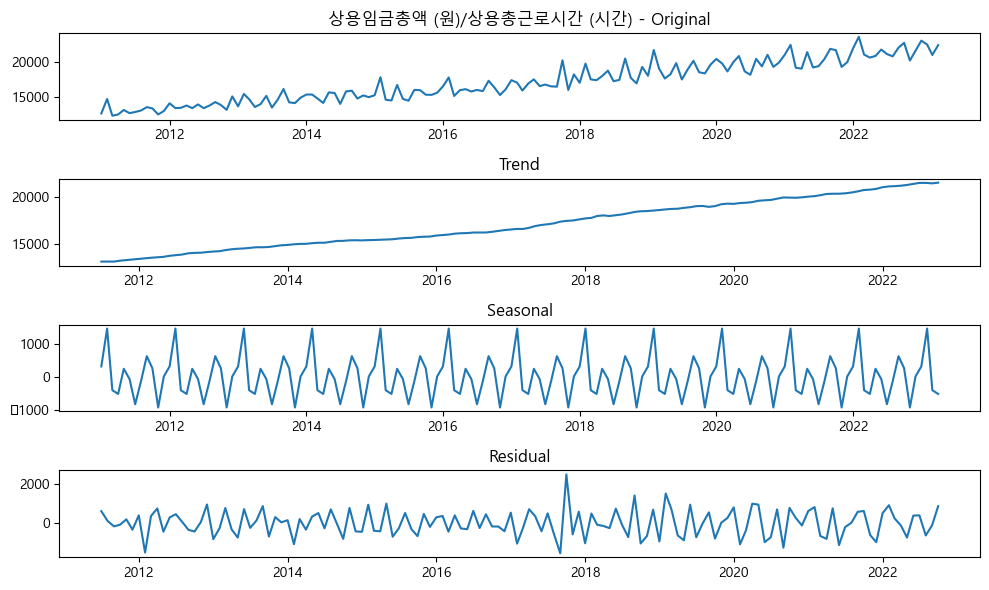

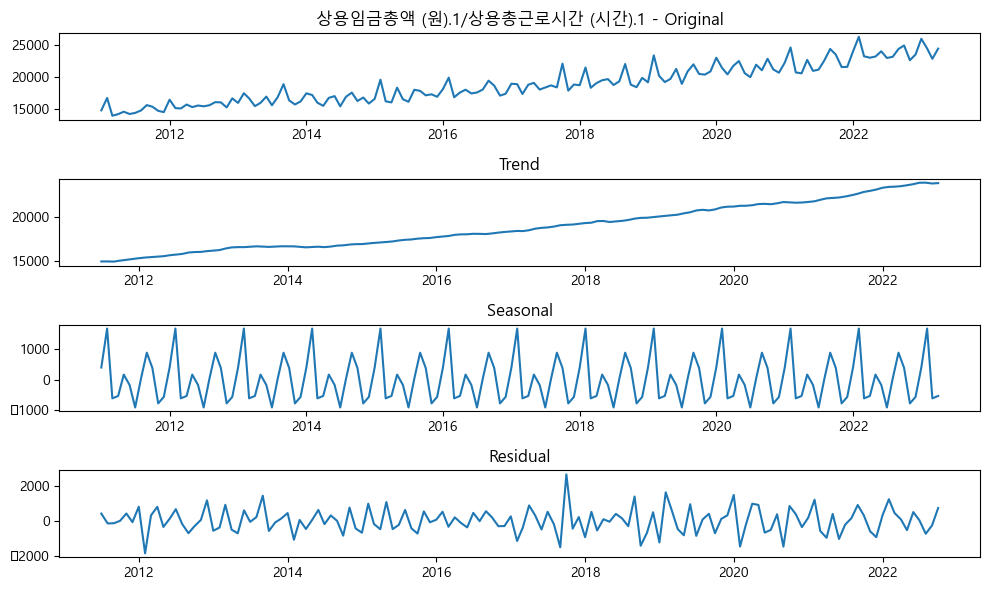

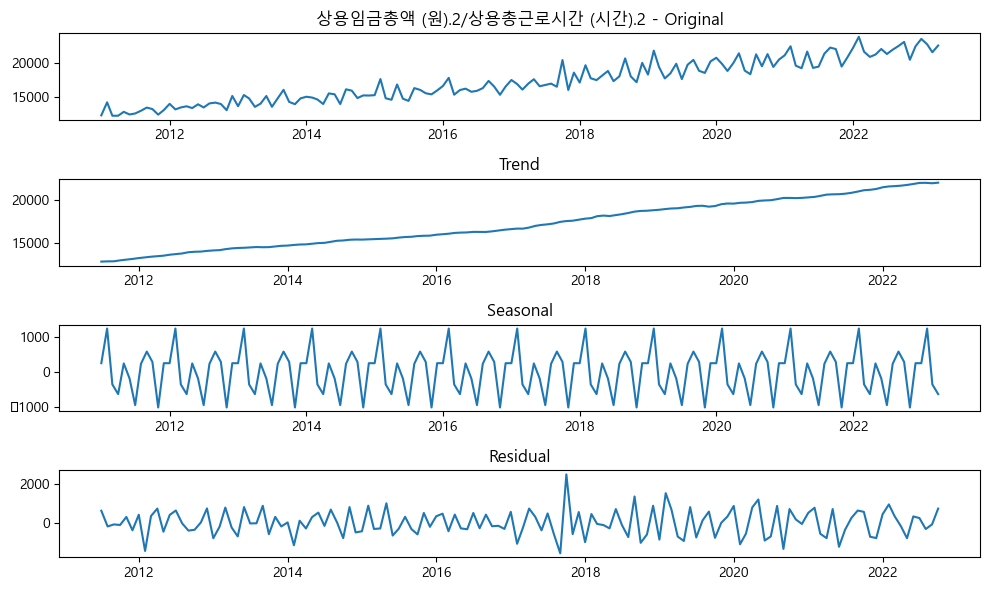

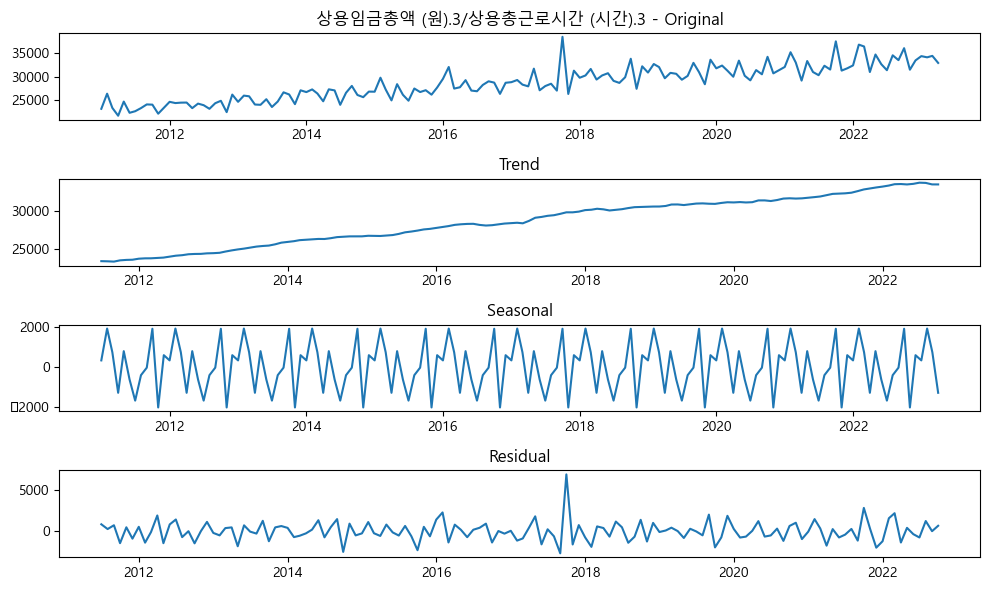

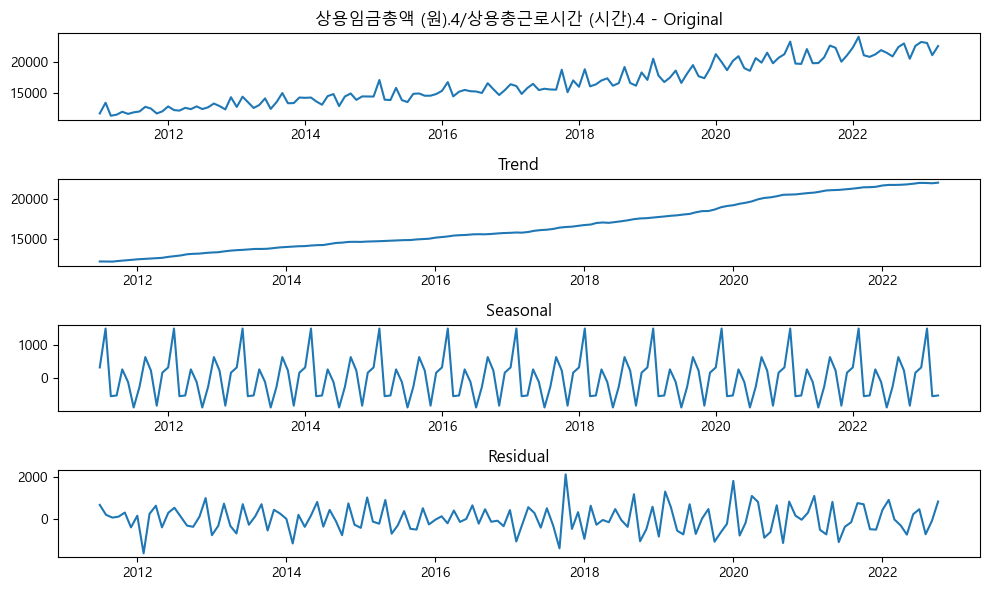

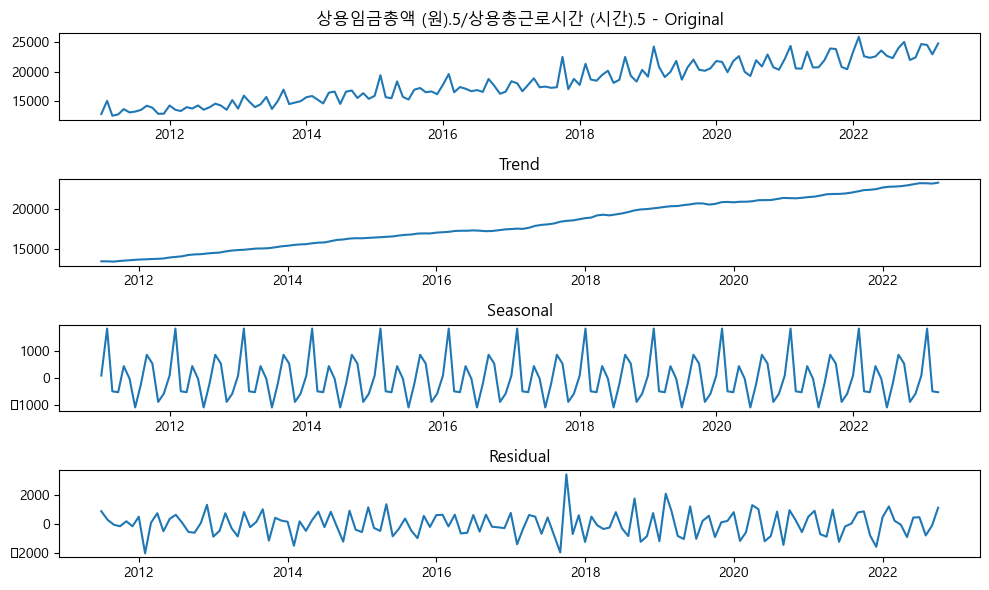

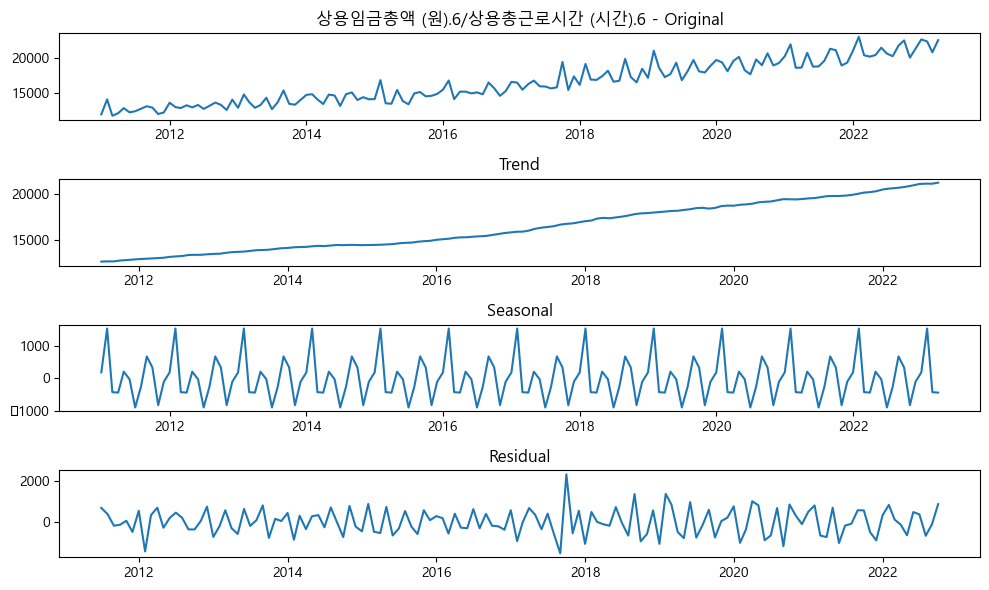

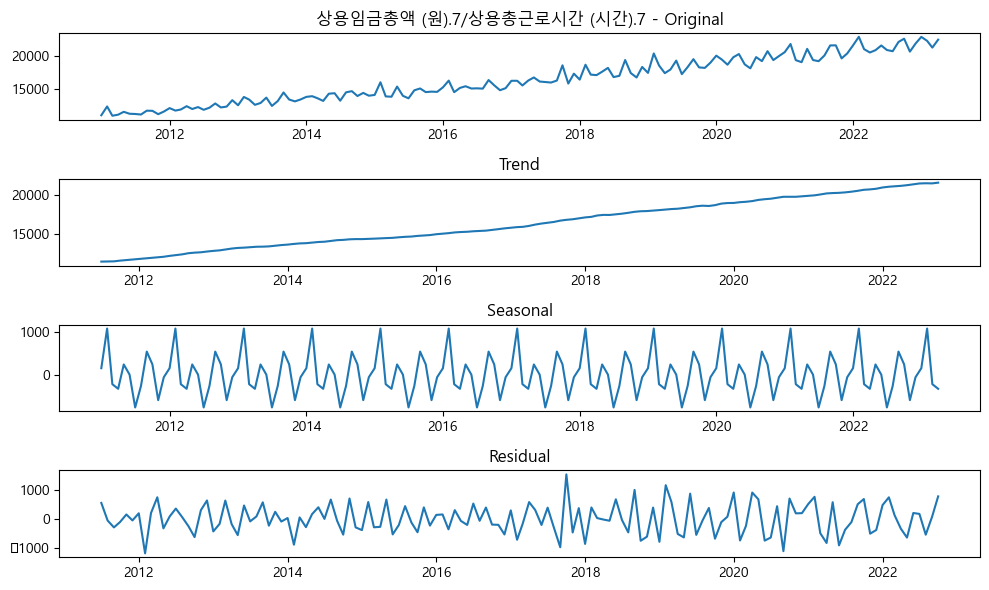

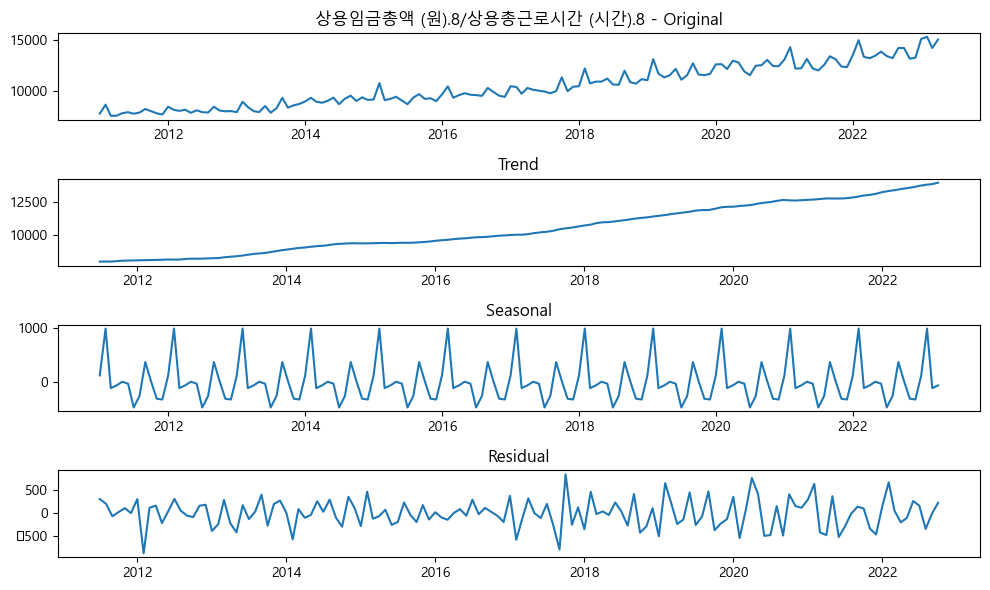

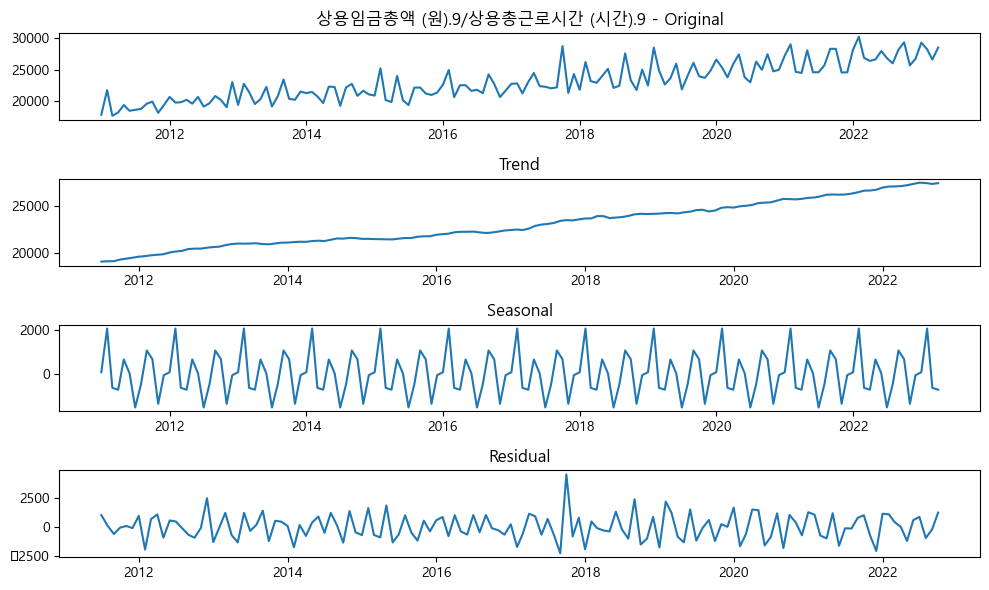

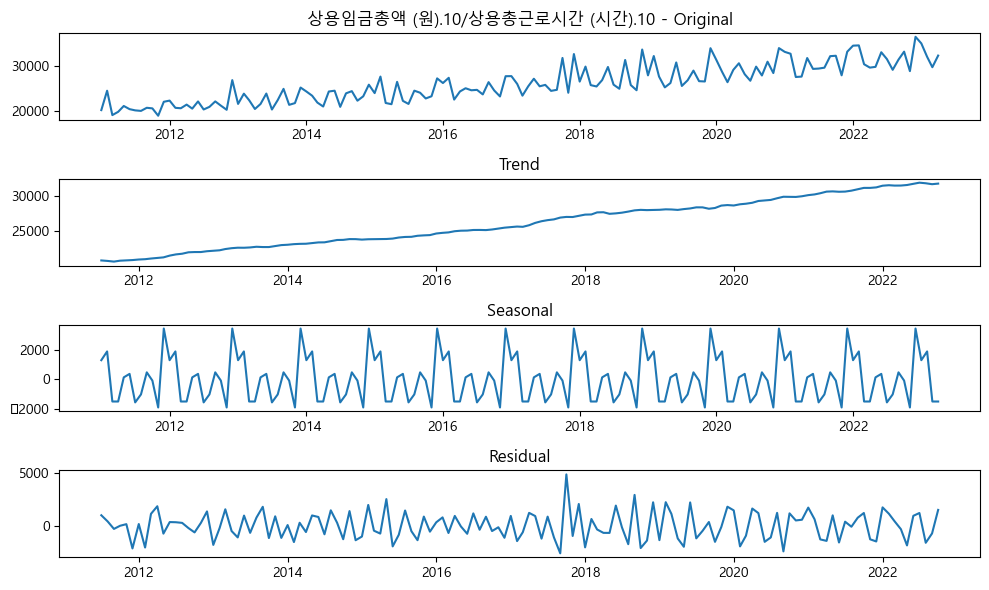

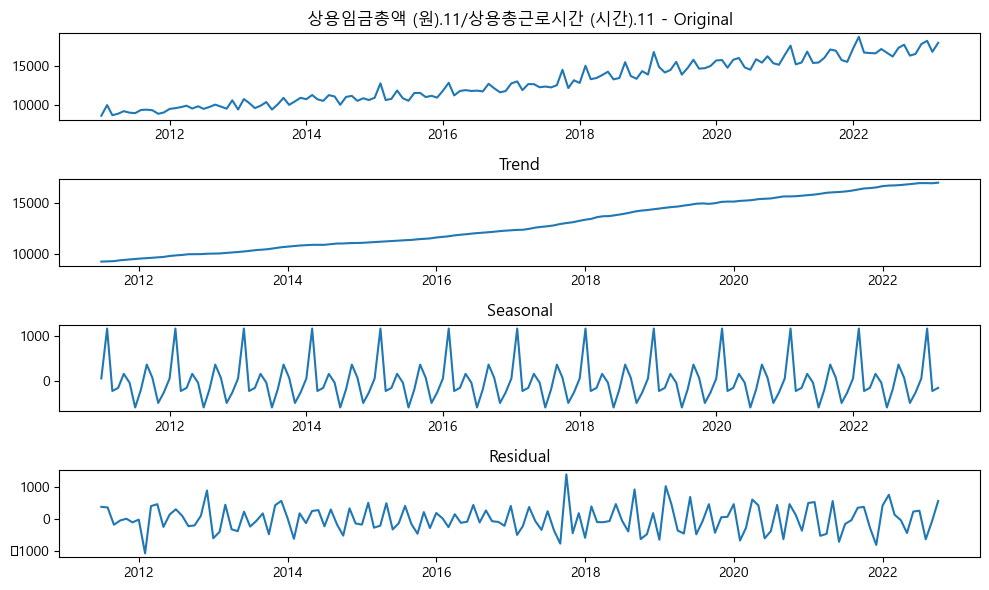

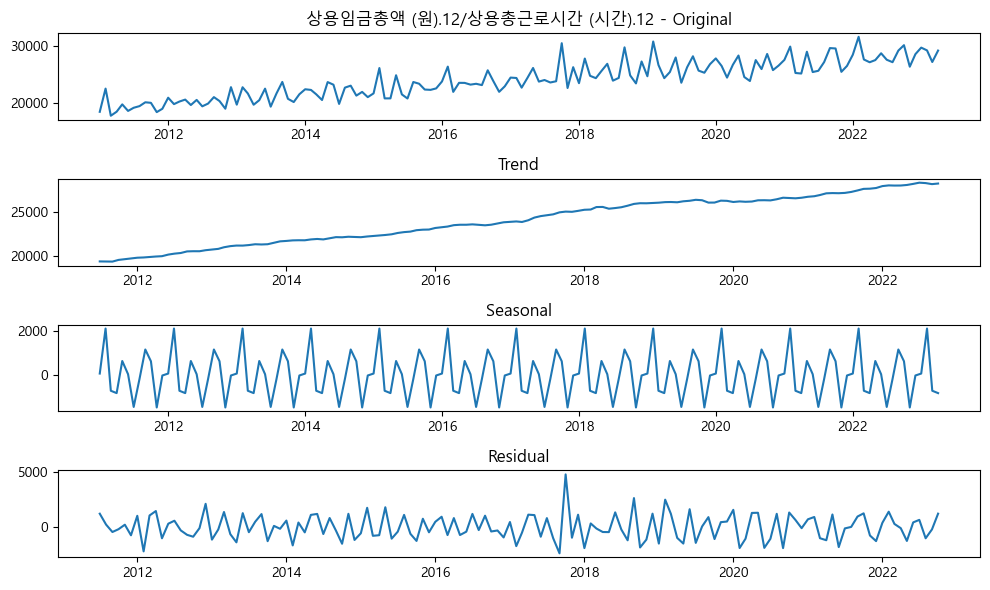

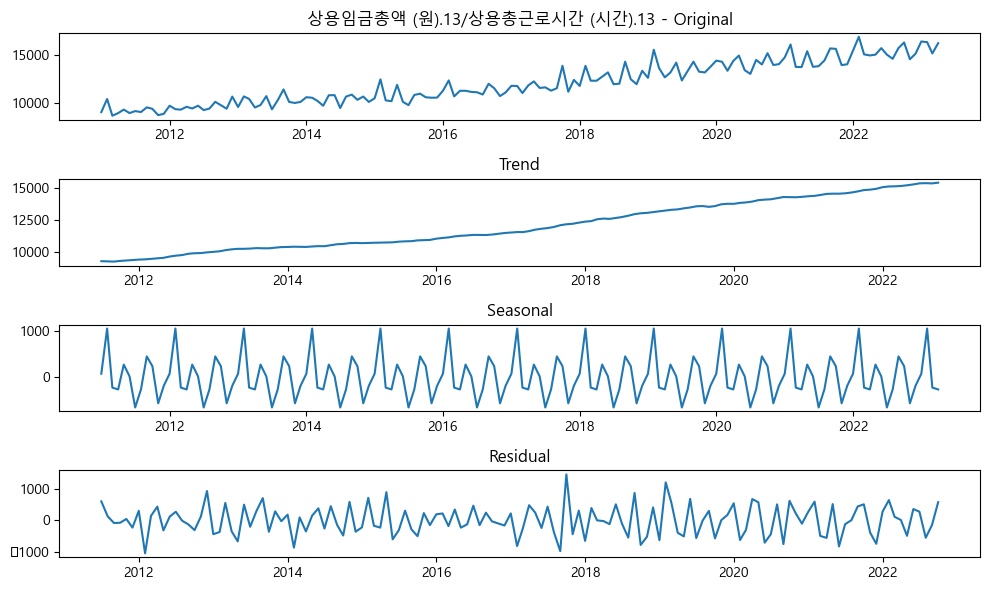

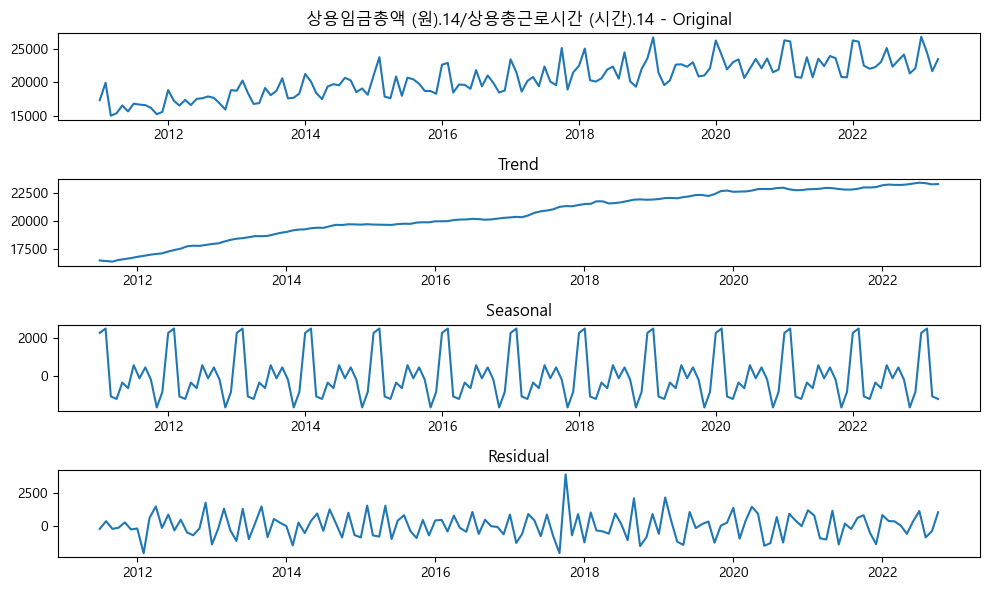

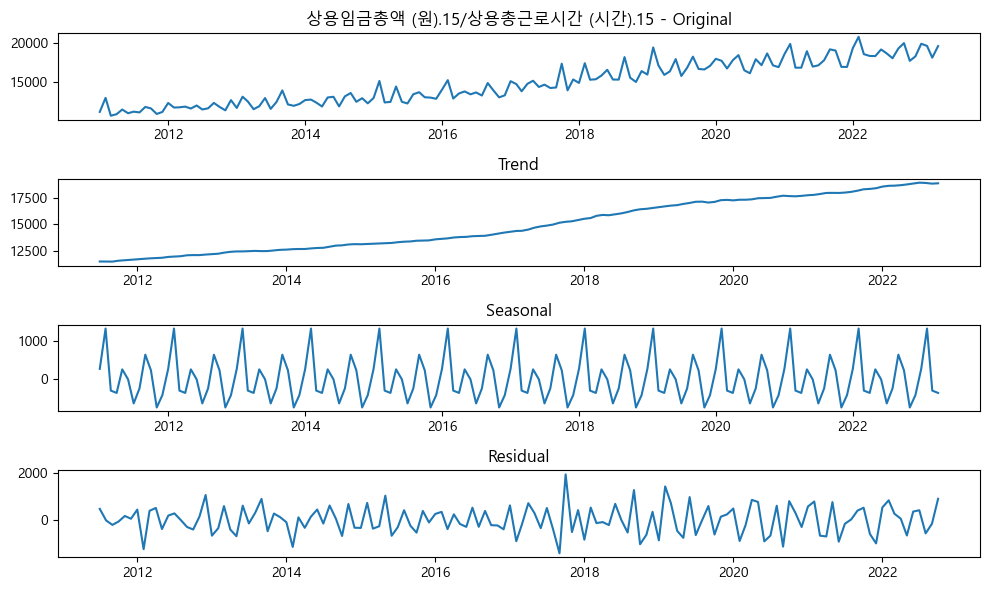

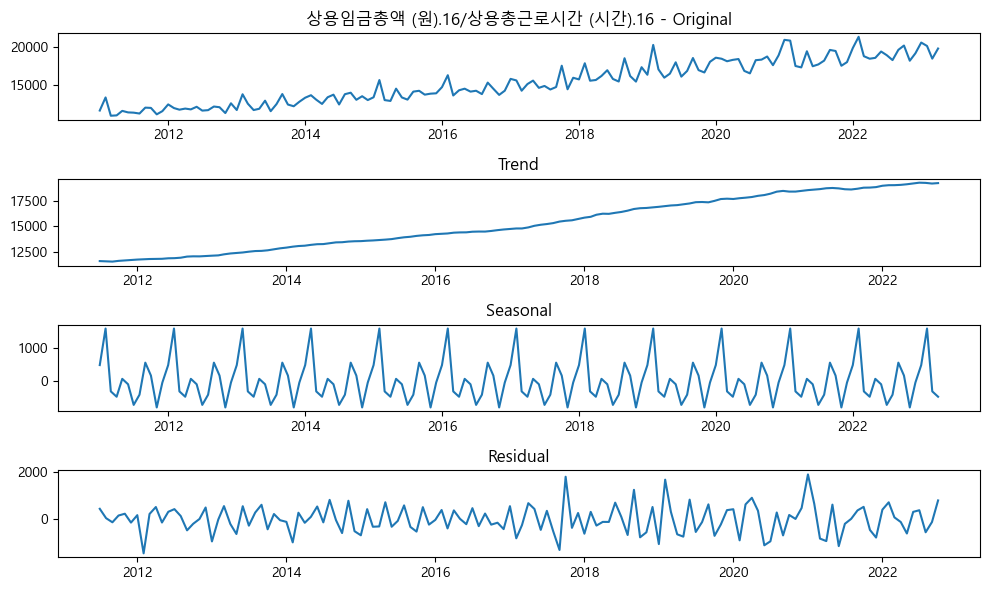

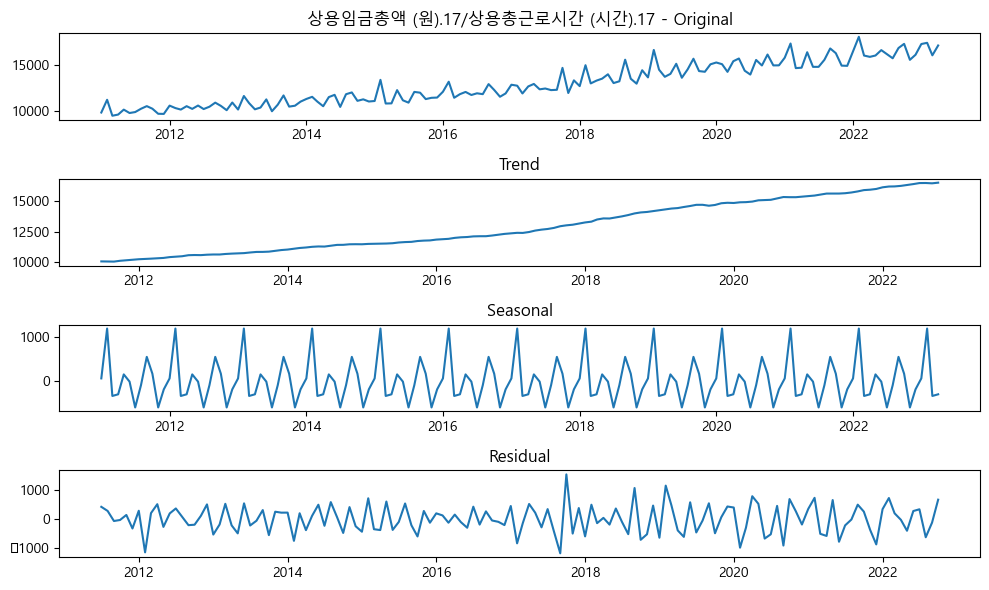

In [5]:
if not isinstance(divided_df.index, pd.DatetimeIndex):
    divided_df.index = date

for col in divided_df.columns:
    result = seasonal_decompose(divided_df[col], period=12)
    plt.figure(figsize=(10, 6))
    plt.subplot(4, 1, 1)
    plt.title(f"{col} - Original")
    plt.plot(divided_df[col])
    
    plt.subplot(4, 1, 2)
    plt.title("Trend")
    plt.plot(result.trend)
    
    plt.subplot(4, 1, 3)
    plt.title("Seasonal")
    plt.plot(result.seasonal)
    
    plt.subplot(4, 1, 4)
    plt.title("Residual")
    plt.plot(result.resid)
    
    plt.tight_layout()
    plt.show()

In [6]:
seasonal_df = pd.DataFrame()

# seasonal_decompose를 적용하여 각 열의 추세, 계절성, 잔차를 추출하여 새로운 데이터프레임에 저장
for col in divided_df.columns:
    # seasonal_decompose 함수에 주기를 지정하여 계절성 분해 수행
    result = seasonal_decompose(divided_df[col], period=12)
    
    # 추세, 계절성, 잔차를 새로운 데이터프레임에 저장
    seasonal_df[col] = result.seasonal

# 결과를 출력
print("\nSeasonal:")
print(seasonal_df)



Seasonal:
            상용임금총액 (원)/상용총근로시간 (시간)  상용임금총액 (원).1/상용총근로시간 (시간).1  \
시점                                                                 
2011-01-01               312.331413                   398.307265   
2011-02-01              1464.013231                  1667.076205   
2011-03-01              -409.839041                  -605.238189   
2011-04-01              -522.073890                  -527.658644   
2011-05-01               241.115504                   167.557265   
...                             ...                          ...   
2022-12-01                 8.895807                  -559.757129   
2023-01-01               312.331413                   398.307265   
2023-02-01              1464.013231                  1667.076205   
2023-03-01              -409.839041                  -605.238189   
2023-04-01              -522.073890                  -527.658644   

            상용임금총액 (원).2/상용총근로시간 (시간).2  상용임금총액 (원).3/상용총근로시간 (시간).3  \
시점                              

In [7]:
# Create a new dataframe to store the results
result_df_wage = pd.DataFrame()

# Iterate through the columns of divided_df and seasonal_df
for col_divided, col_seasonal in zip(divided_df.columns, seasonal_df.columns):
    # Subtract the seasonal component from divided_df from the seasonal_df
    result_df_wage[col_divided] = divided_df[col_divided] - seasonal_df[col_seasonal]

print(result_df_wage)

            상용임금총액 (원)/상용총근로시간 (시간)  상용임금총액 (원).1/상용총근로시간 (시간).1  \
시점                                                                 
2011-01-01             12345.668587                 14423.692735   
2011-02-01             13235.986769                 15084.923795   
2011-03-01             12738.839041                 14587.238189   
2011-04-01             13028.073890                 14759.658644   
2011-05-01             12901.884496                 14442.442735   
...                             ...                          ...   
2022-12-01             21544.104193                 24083.757129   
2023-01-01             22663.668587                 25578.692735   
2023-02-01             20961.986769                 22803.923795   
2023-03-01             21353.839041                 23464.238189   
2023-04-01             22860.073890                 24975.658644   

            상용임금총액 (원).2/상용총근로시간 (시간).2  상용임금총액 (원).3/상용총근로시간 (시간).3  \
시점                                         

In [8]:
divided_df2 = pd.DataFrame()
for i in range(0, len(result_df.columns), 2):
    col_name = f"{result_df.columns[i]}"
    divided_df2[col_name] = result_df[result_df.columns[i]]
print(divided_df2)

     상용총근로시간 (시간)  상용총근로시간 (시간).1  상용총근로시간 (시간).2  상용총근로시간 (시간).3  \
0           184.7           189.1           194.8           179.6   
1           157.9           162.6           166.4           159.1   
2           191.3           199.6           200.8           179.1   
3           187.9           195.8           198.0           189.4   
4           179.7           190.8           191.1           166.3   
..            ...             ...             ...             ...   
143         173.8           186.0           182.2           166.9   
144         160.5           166.7           168.4           161.7   
145         160.0           172.1           168.6           160.6   
146         173.9           186.5           183.7           156.4   
147         161.9           173.9           171.6           165.4   

     상용총근로시간 (시간).4  상용총근로시간 (시간).5  상용총근로시간 (시간).6  상용총근로시간 (시간).7  \
0             190.1           178.1           186.6           181.9   
1             163.5          

C:\Users\KYM\AppData\Local\Temp\ipykernel_17760\1698234156.py:27: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\Users\KYM\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


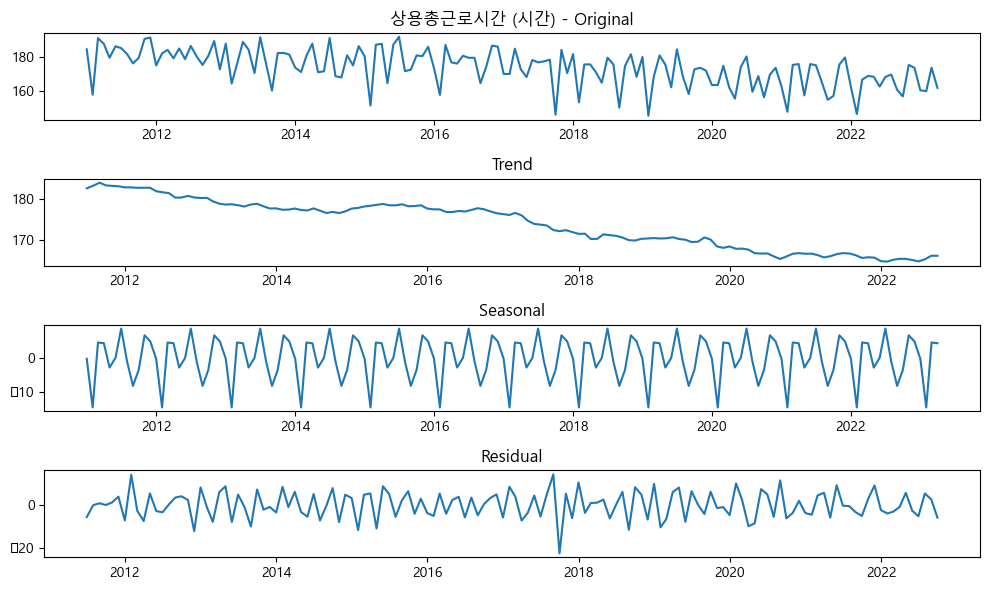

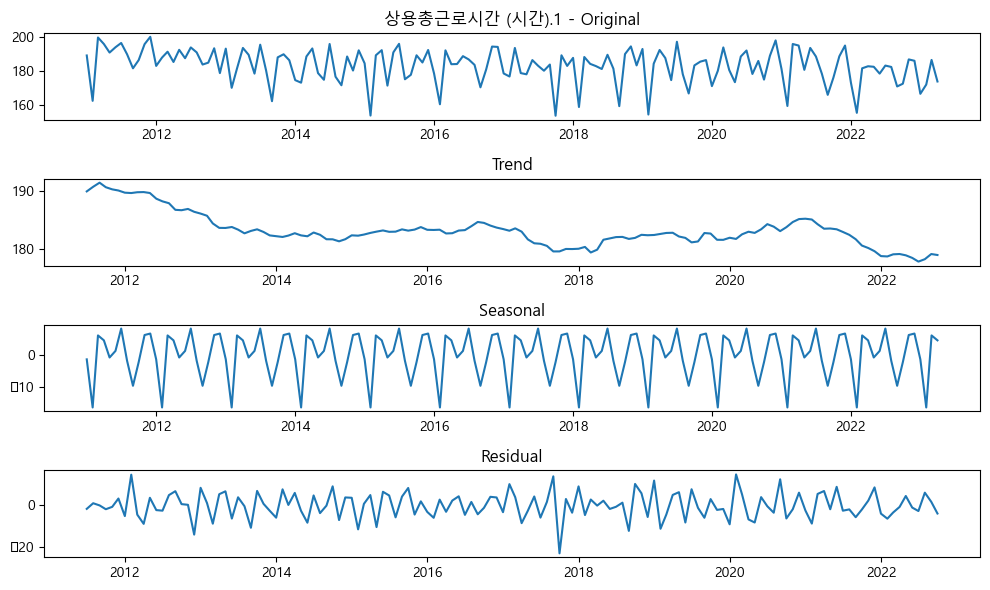

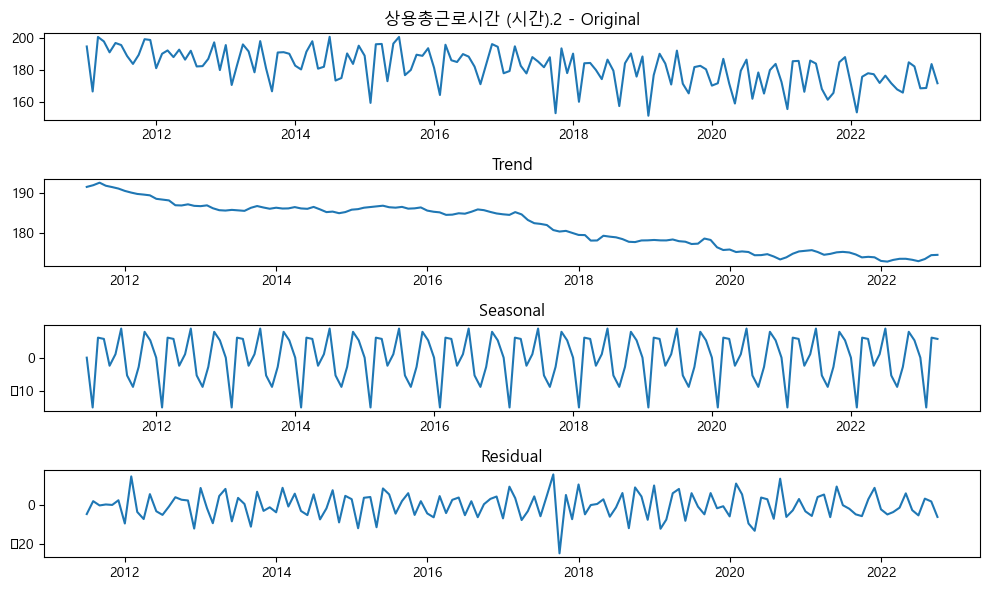

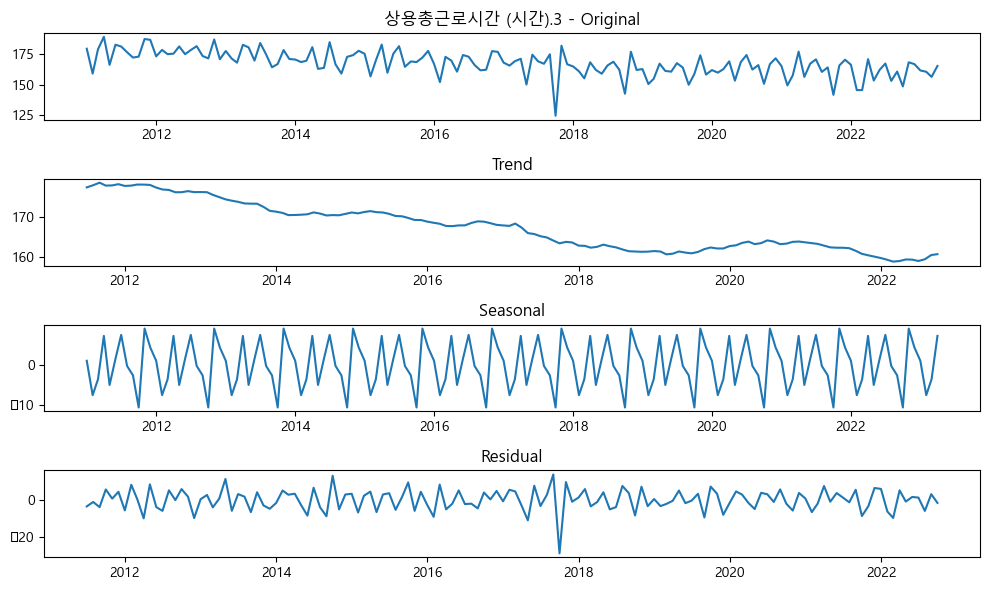

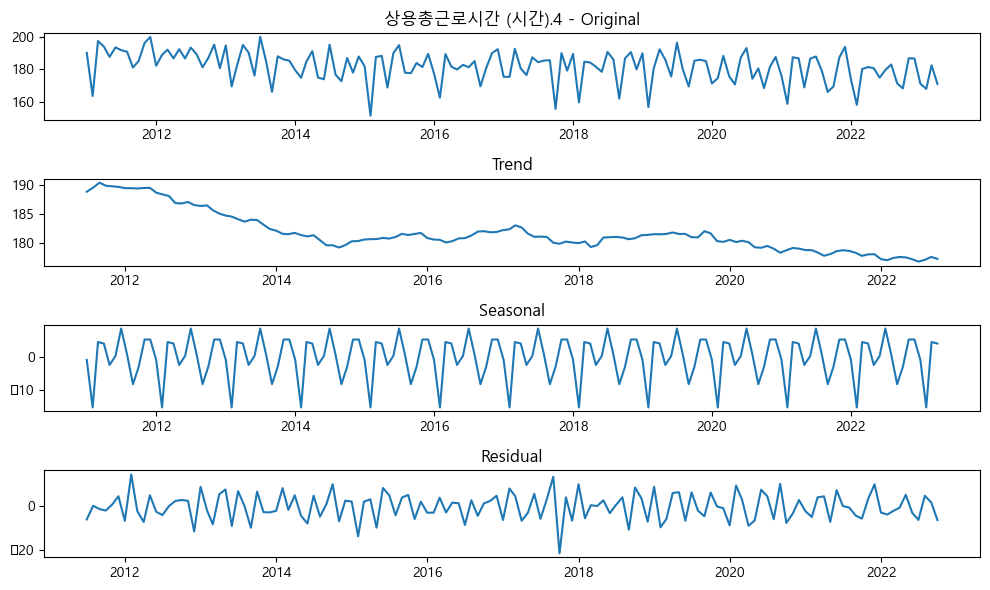

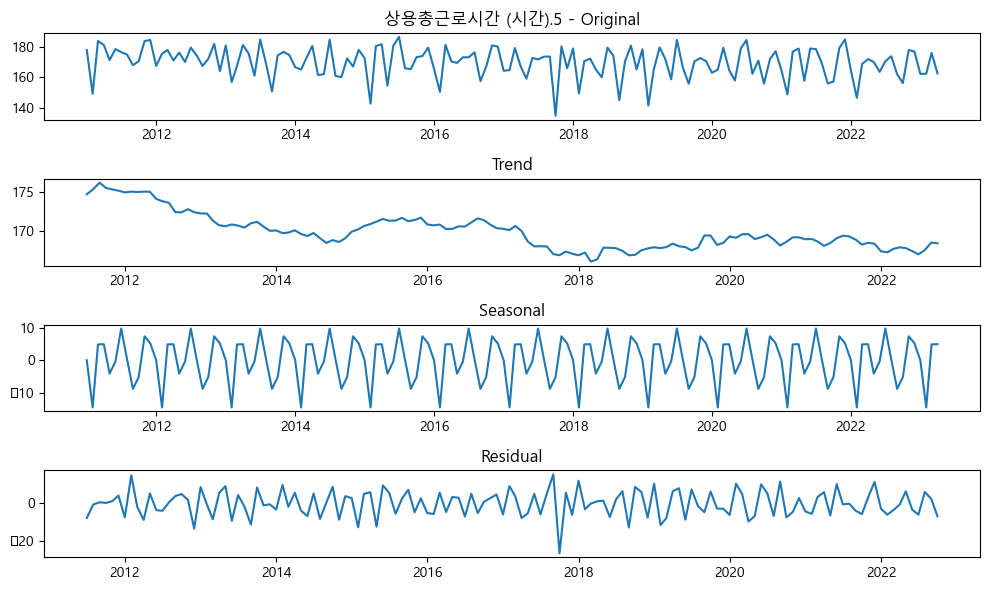

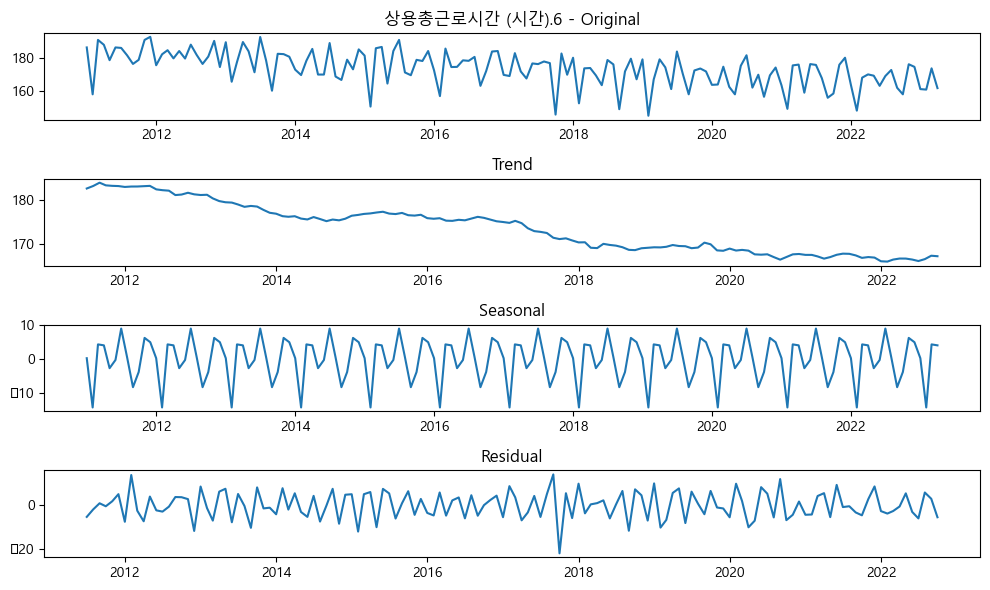

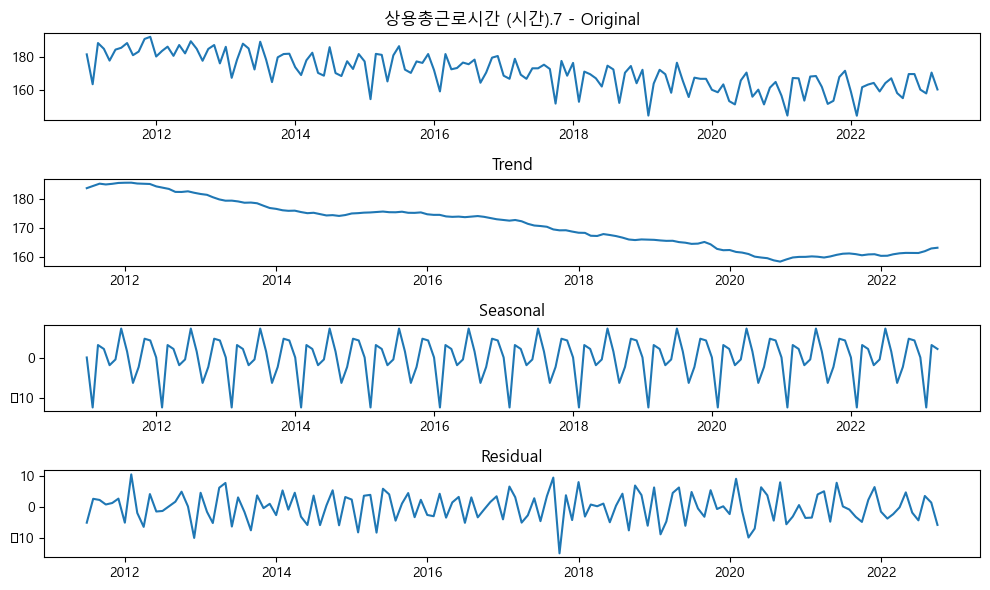

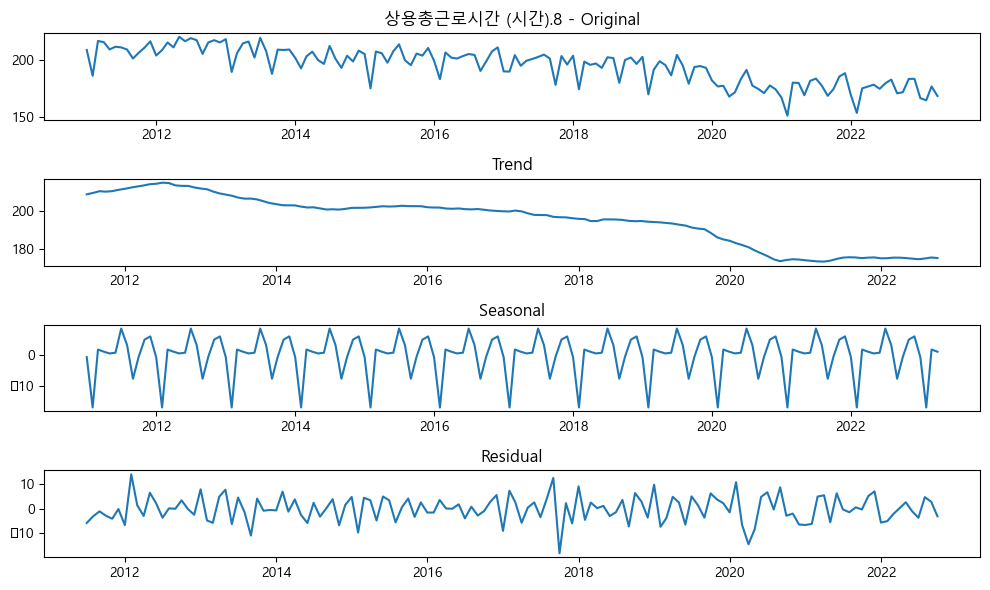

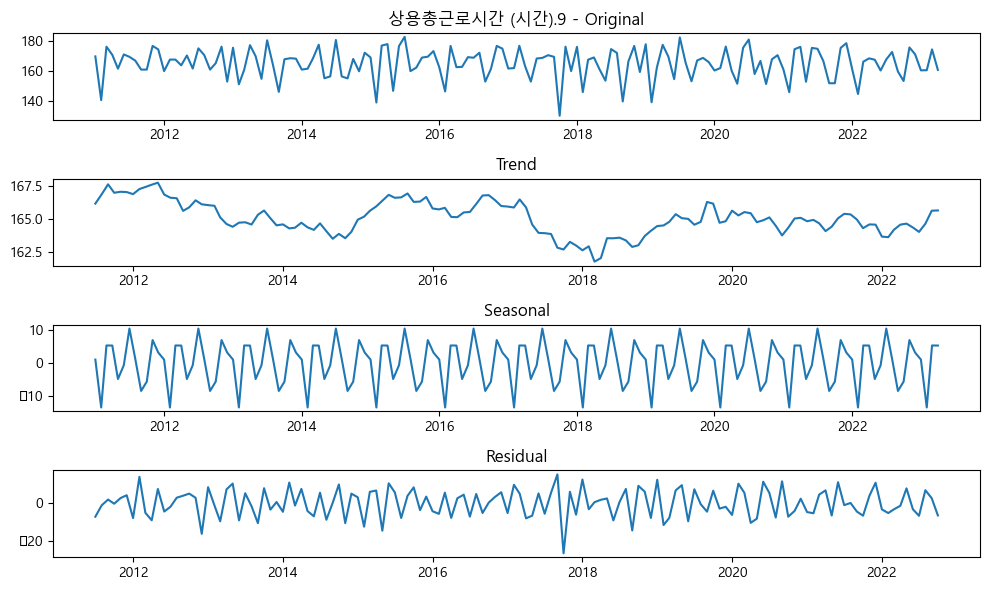

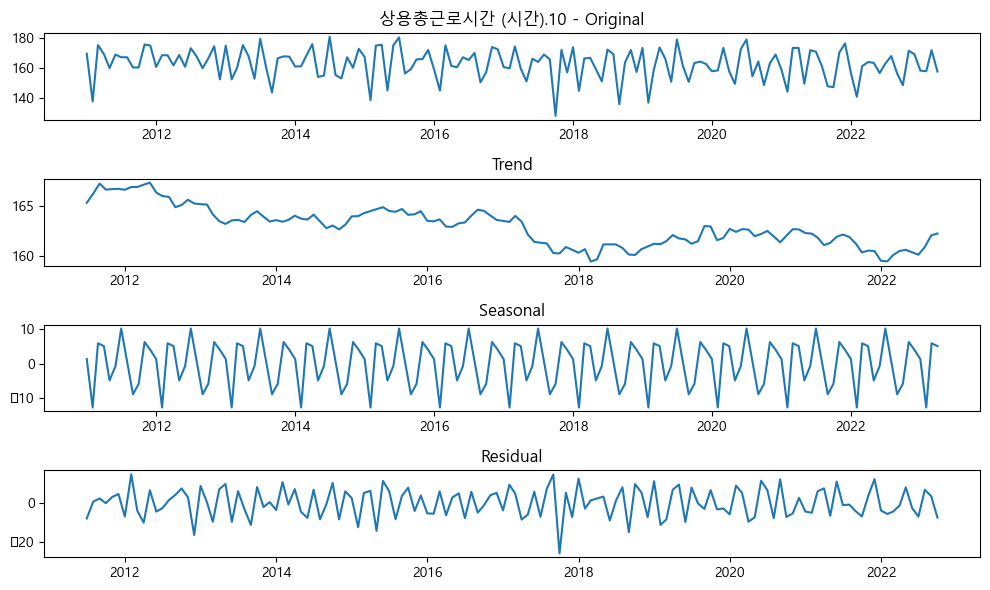

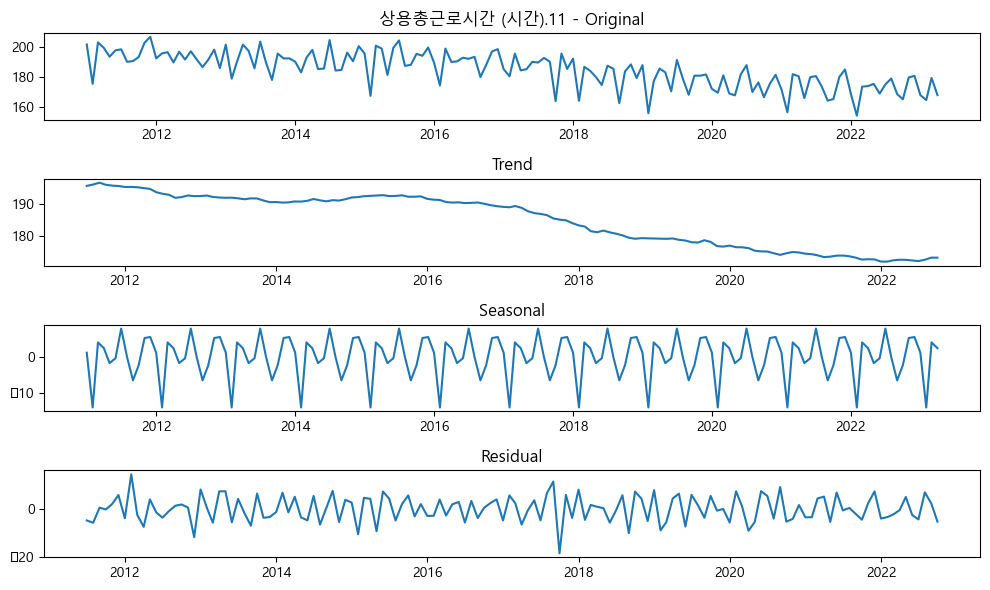

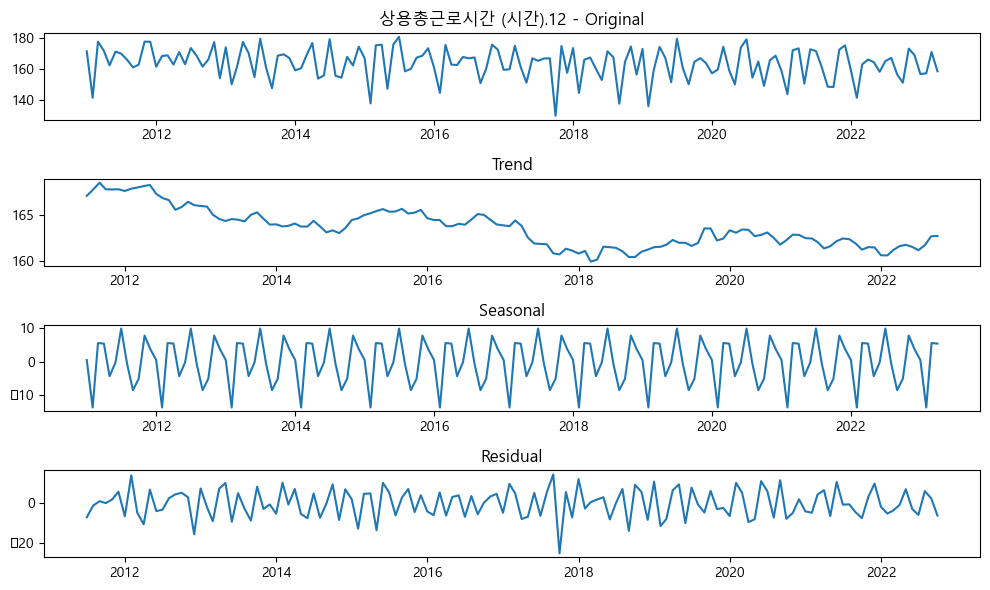

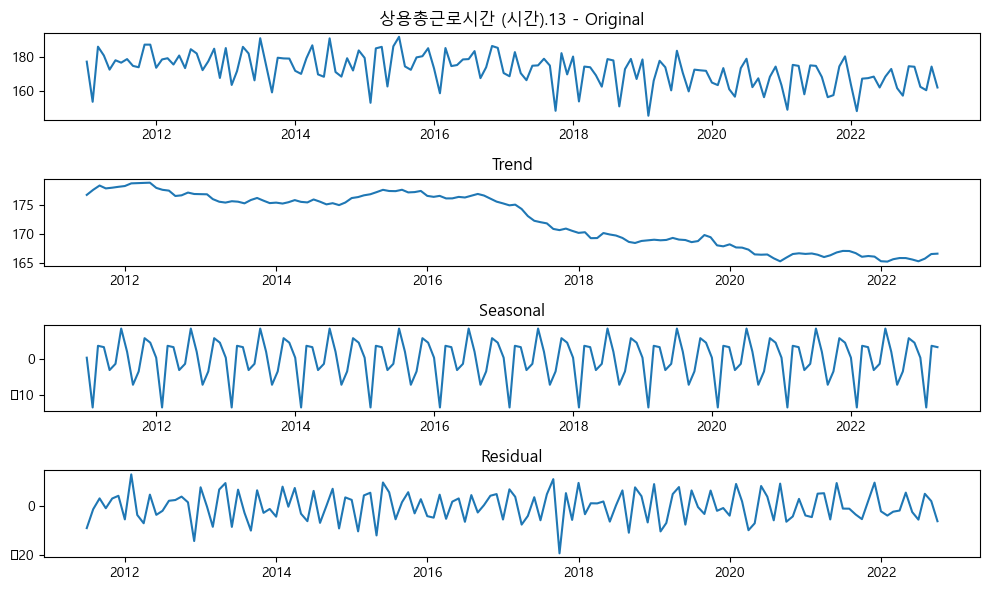

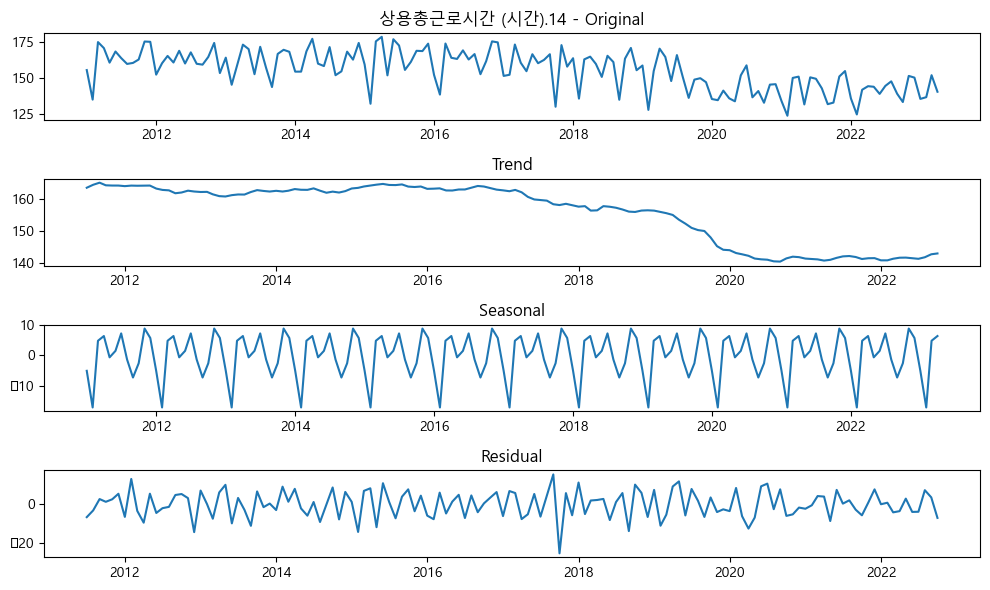

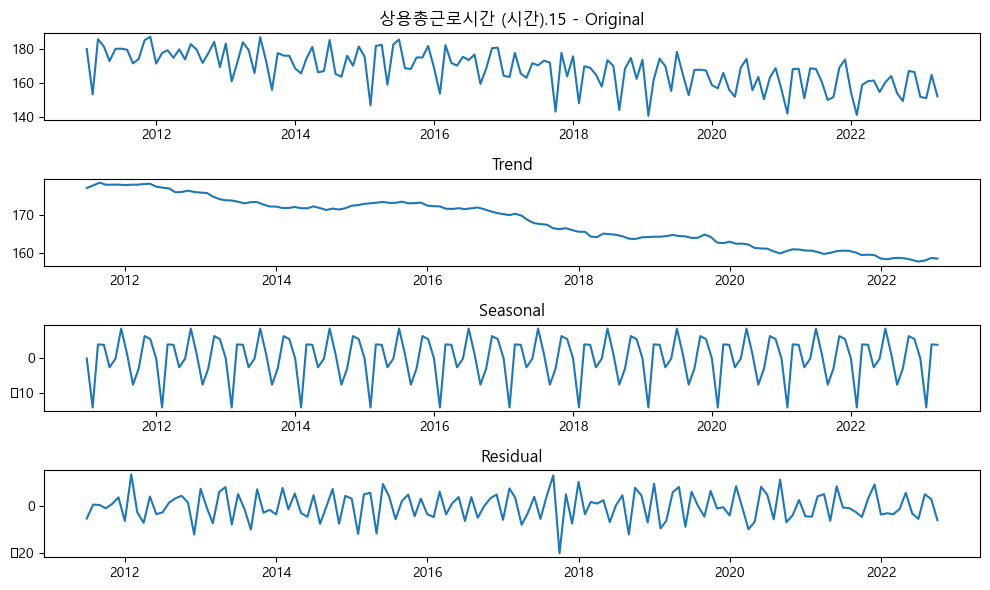

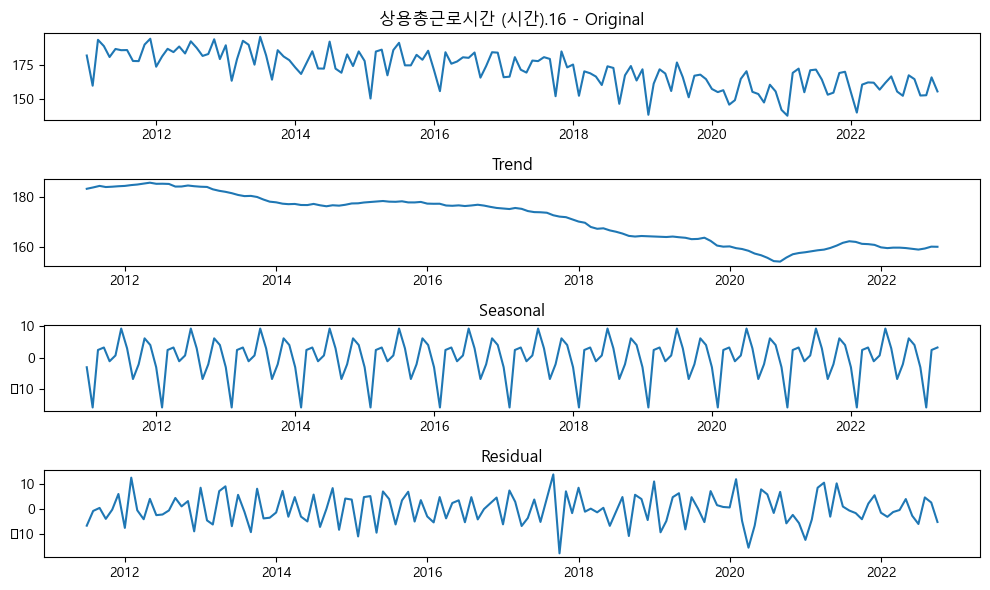

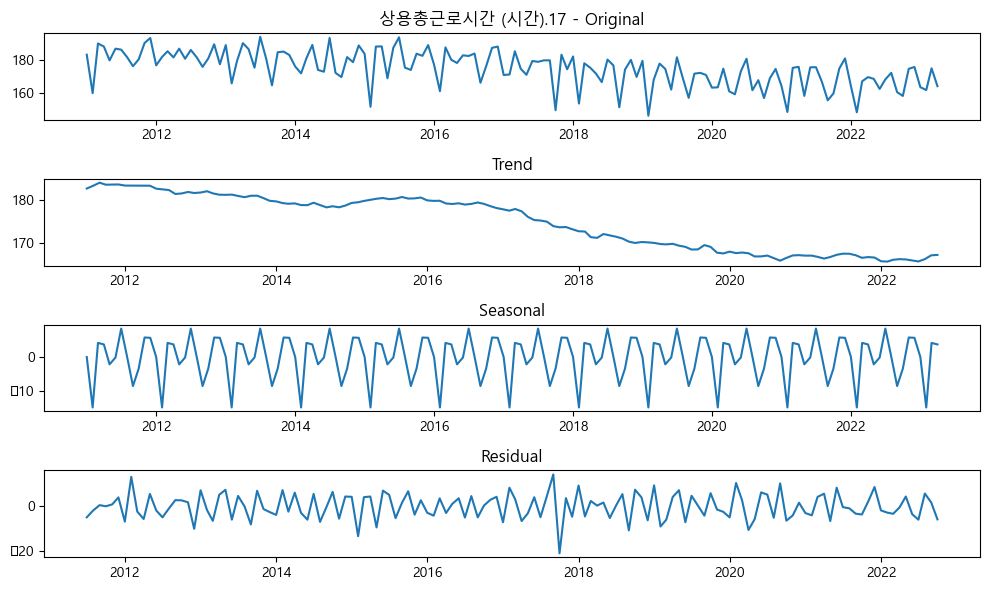

In [9]:
if not isinstance(divided_df2.index, pd.DatetimeIndex):
    divided_df2.index = date

# seasonal_decompose를 적용하여 각 열에 대한 플롯 생성
for col in divided_df2.columns:
    # seasonal_decompose 함수에 주기를 지정하여 계절성 분해 수행
    result = seasonal_decompose(divided_df2[col], period=12)
    
    # 플롯 생성
    plt.figure(figsize=(10, 6))
    plt.subplot(4, 1, 1)
    plt.title(f"{col} - Original")
    plt.plot(divided_df2[col])
    
    plt.subplot(4, 1, 2)
    plt.title("Trend")
    plt.plot(result.trend)
    
    plt.subplot(4, 1, 3)
    plt.title("Seasonal")
    plt.plot(result.seasonal)
    
    plt.subplot(4, 1, 4)
    plt.title("Residual")
    plt.plot(result.resid)
    
    plt.tight_layout()
    plt.show()

In [10]:
seasonal_df = pd.DataFrame()

# seasonal_decompose를 적용하여 각 열의 추세, 계절성, 잔차를 추출하여 새로운 데이터프레임에 저장
for col in divided_df2.columns:
    # seasonal_decompose 함수에 주기를 지정하여 계절성 분해 수행
    result = seasonal_decompose(divided_df2[col], period=12)
    
    # 추세, 계절성, 잔차를 새로운 데이터프레임에 저장
    seasonal_df[col] = result.seasonal

# 결과를 출력
print("\nSeasonal:")
print(seasonal_df)


Seasonal:
            상용총근로시간 (시간)  상용총근로시간 (시간).1  상용총근로시간 (시간).2  상용총근로시간 (시간).3  \
시점                                                                         
2011-01-01     -0.131032       -1.452933       -0.006831        0.923766   
2011-02-01    -14.402623      -16.565812      -14.886756       -7.497446   
2011-03-01      4.647756        6.066006        5.966654       -3.619037   
2011-04-01      4.429196        4.522067        5.590517        7.026797   
2011-05-01     -2.699213       -0.864675       -2.418574       -4.998203   
...                  ...             ...             ...             ...   
2022-12-01      4.968968        6.656916        5.160972        4.174145   
2023-01-01     -0.131032       -1.452933       -0.006831        0.923766   
2023-02-01    -14.402623      -16.565812      -14.886756       -7.497446   
2023-03-01      4.647756        6.066006        5.966654       -3.619037   
2023-04-01      4.429196        4.522067        5.590517        7.026797   



In [35]:
# Create a new dataframe to store the results
result_df_hour = pd.DataFrame()

# Iterate through the columns of divided_df and seasonal_df
for col_divided, col_seasonal in zip(divided_df2.columns, seasonal_df.columns):
    # Subtract the seasonal component from divided_df from the seasonal_df
    result_df_hour[col_divided] = divided_df2[col_divided] - seasonal_df[col_seasonal]

print(result_df_hour)

     상용총근로시간 (시간)  상용총근로시간 (시간).1  상용총근로시간 (시간).2  상용총근로시간 (시간).3  \
0      184.831032      190.552933      194.806831      178.676234   
1      172.302623      179.165812      181.286756      166.597446   
2      186.652244      193.533994      194.833346      182.719037   
3      183.470804      191.277933      192.409483      182.373203   
4      182.399213      191.664675      193.518574      171.298203   
..            ...             ...             ...             ...   
143    168.831032      179.343084      177.039028      162.725855   
144    160.631032      168.152933      168.406831      160.776234   
145    174.402623      188.665812      183.486756      168.097446   
146    169.252244      180.433994      177.733346      160.019037   
147    157.470804      169.377933      166.009483      158.373203   

     상용총근로시간 (시간).4  상용총근로시간 (시간).5  상용총근로시간 (시간).6  상용총근로시간 (시간).7  \
0        190.895415      178.038813      186.349519      181.836856   
1        178.837839      163.

In [37]:
# Create an empty dataframe to store the combined result
combined_df = pd.DataFrame()

# Get the number of columns in each dataframe
num_cols = min(len(result_df_hour.columns), len(result_df_wage.columns))

# Combine the dataframes while alternating their columns
for i in range(num_cols):
    combined_df[result_df_hour.columns[i]] = result_df_hour[result_df_hour.columns[i]]
    combined_df[result_df_wage.columns[i]] = result_df_wage[result_df_wage.columns[i]]

# If one dataframe has more columns than the other, add the remaining columns from that dataframe
if len(result_df_hour.columns) > num_cols:
    for i in range(num_cols, len(result_df_hour.columns)):
        combined_df[result_df_hour.columns[i]] = result_df_hour[result_df_hour.columns[i]]

if len(result_df_wage.columns) > num_cols:
    for i in range(num_cols, len(result_df_wage.columns)):
        combined_df[result_df_wage.columns[i]] = result_df_wage[result_df_wage.columns[i]]

# Assuming you have a dataframe with dates named 'date_df'
# Insert the 'date_df' as the first column in 'combined_df'
date_df = date
combined_df = pd.concat([date_df, combined_df], axis=1)

print(combined_df)

            시점  상용총근로시간 (시간)  상용임금총액 (원)/상용총근로시간 (시간)  상용총근로시간 (시간).1  \
0   2011-01-01    184.831032             12345.668587      190.552933   
1   2011-02-01    172.302623             13235.986769      179.165812   
2   2011-03-01    186.652244             12738.839041      193.533994   
3   2011-04-01    183.470804             13028.073890      191.277933   
4   2011-05-01    182.399213             12901.884496      191.664675   
..         ...           ...                      ...             ...   
143 2022-12-01    168.831032             21544.104193      179.343084   
144 2023-01-01    160.631032             22663.668587      168.152933   
145 2023-02-01    174.402623             20961.986769      188.665812   
146 2023-03-01    169.252244             21353.839041      180.433994   
147 2023-04-01    157.470804             22860.073890      169.377933   

     상용임금총액 (원).1/상용총근로시간 (시간).1  상용총근로시간 (시간).2  상용임금총액 (원).2/상용총근로시간 (시간).2  \
0                   14423.692735      194.

In [38]:
output_file_path = "result_deseasonal.xlsx"

# Save the result_df dataframe to Excel
combined_df.to_excel(output_file_path, index=False)

print(f"Dataframe has been saved to {output_file_path}")

Dataframe has been saved to result_deseasonal.xlsx
